# [POLSCI-5] Immigration

Estimated Time: 30-40 minutes <br>
Created by: Lauren Hom, Ravi Singhal 

Today we will be examining three data sets on immigration to the United States, where these datasets were created from data collected by the United States Department of Homeland Security... **TO DO**  

### Table of Contents 
0 - [Jupyter Introduction ](#0) <br>
1 - [The Dataset](#1)<br>
2 - [Table 1: Persons Obtaining Lawful Permanent Resident Status](#2)<br>
3 - [Table 2: Immigration by Class and Permanent Residence](#3)<br>
4 - [Table 3: Immigration by Last Permanent Residence](#4)<br>
5 - [Discussion](#5)<br>
6 - [Bibliography](#6)

# Jupyter Introduction <a id='0'></a>

This webpage is a Jupyter Notebook. **Notebooks** are documents that can contain text, code, visualizations, and more. 

A notebook is composed of rectangular sections called **cells**. There are 2 kinds of cells: markdown and code. A **markdown cell**, such as this one, contains text. A **code cell** contains code in Python, a programming language that we will be using for the remainder of this module. You can select any cell by clicking it once. After a cell is selected, you can navigate the notebook using the up and down arrow keys.

To run a code cell once it's been selected, 
- press `Shift + Enter`, or
- click the `▶| Run` button in the toolbar at the top of the screen. 

If a code cell is running, you will see an asterisk (\*) appear in the square brackets to the left of the cell. Once the cell has finished running, a number will replace the asterisk and any output from the code will appear under the cell. 

An example of a code cell is below. Try running it. If everything works properly, the word "Success" should be printed under the cell.

In [1]:
# This cell sets up the notebook. Just run this cell.
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

print("Success!")

Success!


You'll notice that many code cells contain lines of blue text that start with a `#`. These are *comments*. Comments often contain helpful information about what the code does or what you are supposed to do in the cell. The leading `#` tells the computer to ignore them.

# The Dataset <a id='1'></a>

The three tables (datasets) contain information about immigration to the United States. Here is a description of the data as stated on the United States Department of Homeland Security:

> "The 2017 Yearbook of Immigration Statistics is a compendium of tables that provide data on foreign nationals who are granted lawful permanent residence (i.e., immigrants who receive a “green card”), admitted as temporary nonimmigrants, granted asylum or refugee status, or are naturalized. The Yearbook also presents data on immigration enforcement actions, including apprehensions and arrests, removals, and returns"

The three datasets we will be looking at contain data on:
- Foreign nationals granted lawful permanent residence (i.e., immigrants who receive a “green card”) 
- Immigration enforcement actions 

<br>If you want to read more about the dataset, click [here](https://www.dhs.gov/immigration-statistics/yearbook/2017).


# Table 1: Persons Obtaining Lawful Permanent Resident Status <a id='2'></a>

The first table we will explore contains data on the number of immigrants who obtained lawful permanent residence or received a "green card" to the U.S. on a temporary basis between 1989-2017 for a given country. 

Here are the first 5 rows of the table. There are 5925 rows and 3 columns.

In [2]:
region_country = Table.read_table('ImmigrantsRegionCountry.csv') # read in the dataset
region_country.show(5)

fiscal_year,country,total
1989,Afghanistan,3232
1989,Albania,71
1989,Algeria,230
1989,American Samoa,1
1989,Andorra,4


### Column

First, let's examine what a *column* is. There are a total of 3 columns in this table:
- `fiscal_year` - years range from 1989-2017 **CLARIFY FISCAL YEAR AND HOW DEFINED IN THIS CASE?**
- `country` - country where immigrants came from
- `total` - the total number of immigrants for a given fiscal year

Here are some of the countries and regions in the table. There are a total of 240 countries and regions represented in the table.

In [3]:
#Run this cell to display the first 15 countries and regions in the table
countries_regions = region_country.group('country').show(15)
countries_regions

country,count
Afghanistan,29
Albania,29
Algeria,29
American Samoa,19
Andorra,8
Angola,29
Anguilla,29
Antigua-Barbuda,29
Argentina,29
Armenia,26


### Row

Second, let's examine what a *row* is. Each row in the table gives the total number of immigrants admitted during the specific fiscal year for a given country.

For example, here is the first row of the dataset. This row shows that there were 3232 immigrants who were granted lawful permanent residence from Afghanistan from 1989.

In [4]:
region_country.take(0)

fiscal_year,country,total
1989,Afghanistan,3232


Let's look at the data more closely for a specific country.

## Mexico: Persons Obtaining Lawful Permanent Resident Status

We will specifically look at data for Mexico, paying particular attention to the total before and after 2008. 

First, let's filter the overall table so that we only have a subset of the data-- data on only Mexico. The **`where`** function allows us to choose certain rows based on two arguments:
- A column label
- A condition that each row should match, called the _predicate_ 

In other words, we call the `where` function like so: `table_name.where(column_name, predicate)`. 

In [16]:
#Shows only the data for the country Mexico 
mexico = region_country.where('country', 'Mexico')
mexico.show(29)

fiscal_year,country,total
1989,Mexico,405172
1990,Mexico,679068
1991,Mexico,946167
1992,Mexico,213802
1993,Mexico,126561
1994,Mexico,111398
1995,Mexico,89932
1996,Mexico,163572
1997,Mexico,146865
1998,Mexico,131575


### Visualize the Data 

Here is a line plot of the number of immigrants who were granted lawful permanent residence from 1989-2017. 

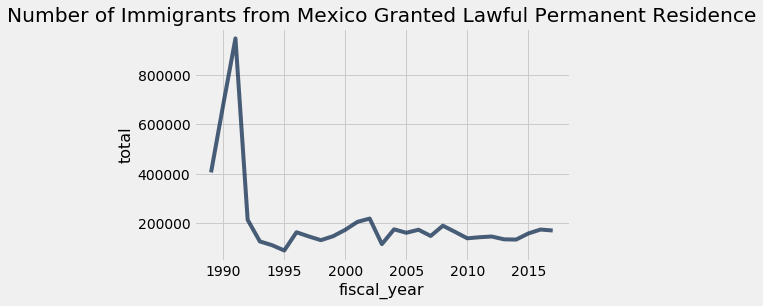

In [19]:
mexico.plot('fiscal_year', 'total') #generates the line plot with fiscal_year on the x-axis and total on the y-axis
plt.title('Number of Immigrants from Mexico Granted Lawful Permanent Residence') #titles the plot
plt.show()

Here is the same plot, but zoomed in so we see the years after 1995 more clearly.
**Maybe delete this plot?**

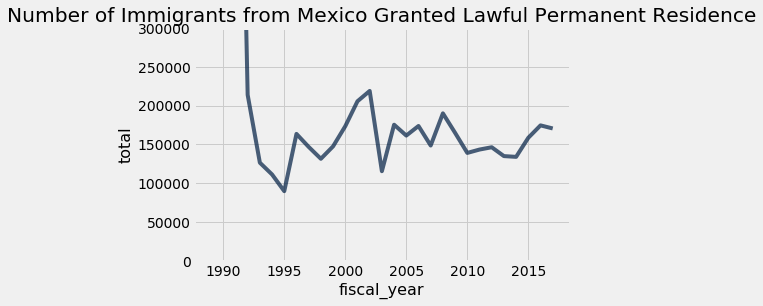

In [25]:
mexico.plot('fiscal_year', 'total') #generates the line plot with fiscal_year on the x-axis and total on the y-axis
plt.title('Number of Immigrants from Mexico Granted Lawful Permanent Residence') #titles the plot
plt.ylim(0, 300000) #Shows the plot from y = 0 to 300000
plt.show()


Let's take a look at the highest and lowest points that appear in the graph. 

The `column` function takes all of the values in the specified column in the form of a list. The `min` function takes many integers (e.g. a list of integers) and returns the smallest. Likewise, the `max` function takes many integers and returns the largest.

In [30]:
#Row with the MINIMUM total 
lowest_total = min(mexico.column('total'))#Takes all of the values from the 'total' column and finds the minimum value
print('Lowest total granted lawful permanent residence:', lowest_total) #prints the lowest total
mexico.where('total', lowest_total) #Finds the row with the lowest total 

Lowest total granted lawful permanent residence: 89932


fiscal_year,country,total
1995,Mexico,89932


In [31]:
#Row with the maximum total immigration in Mexico
highest_total = max(mexico.column('total'))#Takes all of the values from the 'total' column and finds the maximum value
print('Highest total granted lawful permanent residence:', highest_total) #prints the highest total
mexico.where('total', highest_total) #Finds the row with the highest total 

Highest total granted lawful permanent residence: 946167


fiscal_year,country,total
1991,Mexico,946167


### Discussion 1

With a partner discuss the following question:

What happened in Mexico in 1995 and 1991? How might this explain why the total number of immigrants granted lawful permanent status was at its lowest and higest?

# Table 2: Immigration by Class and Permanent Residence <a id='3'></a>

The second table we will explore provides information 

In [33]:
class_perm = Table.read_table('immigrants-class-perm.csv') # read in the dataset
class_perm

country,type,fiscal_year,total
Afghanistan,Cancellation of Removal,1999,6
Afghanistan,Cancellation of Removal,2000,7
Afghanistan,Cancellation of Removal,2001,3
Afghanistan,Cancellation of Removal,2002,1
Afghanistan,Cancellation of Removal,2004,5
Afghanistan,Diversity,1998,6
Afghanistan,Diversity,1999,15
Afghanistan,Diversity,2000,1
Afghanistan,Diversity,2001,22
Afghanistan,Diversity,2002,9
